In [ ]:
!pip install wfdb

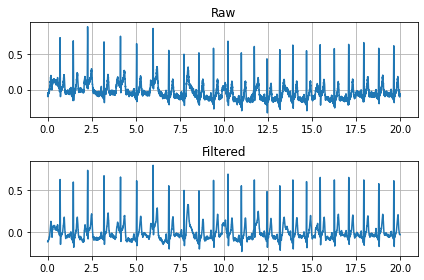

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb

sig, fields = wfdb.rdsamp("/content/drive/MyDrive/Sensor Analytics Data/ecg-id-database-1.0.0/Person_01/rec_1")
df = pd.DataFrame(sig, columns=fields['sig_name'])

f = 500
time = np.arange(0, 20, 1/500)

fig, ax = plt.subplots(2,1)
ax[0].plot(time, df['ECG I'])
ax[1].plot(time, df['ECG I filtered'])

ax[0].grid()
ax[1].grid()

ax[0].set_title("Raw")
ax[1].set_title("Filtered")

# ax[0].set_xlim(0,2)
# ax[1].set_xlim(0,2)

plt.tight_layout()
plt.show()

# Exponential Moving Average filter to reduce high frequency noise

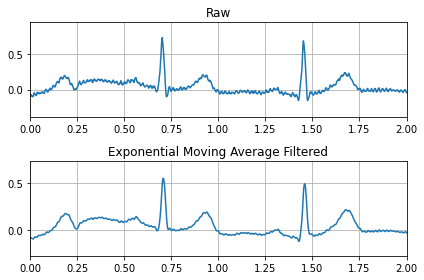

In [ ]:
alpha = 0.2

exp_filtered = df['ECG I'].copy()
for i in range(1, len(df['ECG I'])):
  exp_filtered[i] = alpha * df['ECG I'][i] + (1-alpha) * exp_filtered[i-1]

fig, ax = plt.subplots(2,1)
ax[0].plot(time, df['ECG I'])
ax[1].plot(time, exp_filtered)

ax[0].grid()
ax[1].grid()

ax[0].set_title("Raw")
ax[1].set_title("Exponential Moving Average Filtered")

ax[0].set_xlim(0,2)
ax[1].set_xlim(0,2)

plt.tight_layout()
plt.show()

# Fourier transform

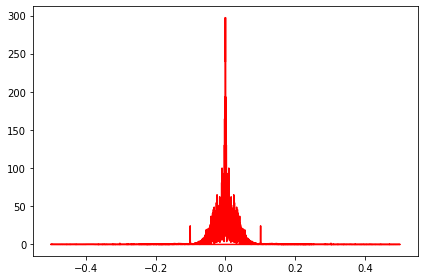

In [ ]:
yf = np.fft.fft(exp_filtered)
xf = np.fft.fftfreq(len(exp_filtered))

fig, ax = plt.subplots(1,1)
ax.plot(xf, np.abs(yf), 'r')

# ax.set_xlim(-0.15, 0.15)
plt.tight_layout()
plt.show()

# Removing low frequency drift

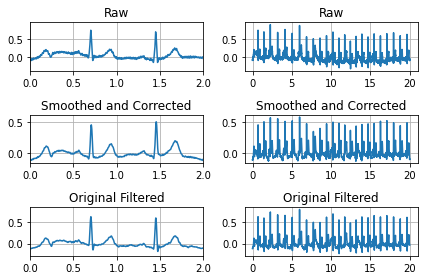

In [ ]:
yf[abs(xf) < 0.002] = 0

y = np.fft.ifft(yf)

fig, ax = plt.subplots(3,2)
[ax[0][i].plot(time, df['ECG I']) for i in range(2)]
[ax[1][i].plot(time, np.real(y)) for i in range(2)]
[ax[2][i].plot(time, df['ECG I filtered']) for i in range(2)]

[[ax[i][j].grid() for j in range(2)] for i in range(3)]

[ax[0][i].set_title("Raw") for i in range(2)]
[ax[1][i].set_title("Smoothed and Corrected") for i in range(2)]
[ax[2][i].set_title("Original Filtered") for i in range(2)]

ax[0][0].set_xlim(0,2)
ax[1][0].set_xlim(0,2)
ax[2][0].set_xlim(0,2)

plt.tight_layout()
plt.show()

# Creating a custom wavelet

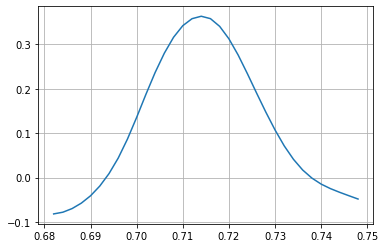

In [ ]:
wavelet_raw = y[(time>0.68) & (time<0.75)]
alpha = 0.2
wavelet = wavelet_raw.copy()
for i in range(1, len(wavelet_raw)):
  wavelet[i] = alpha * wavelet_raw[i] + (1-alpha) * wavelet[i-1]

fig, ax = plt.subplots(1, 1)
ax.plot(time[(time>0.68) & (time<0.75)], np.real(wavelet))

plt.grid()
plt.show()

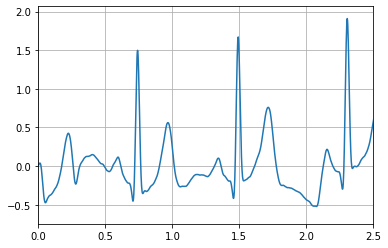

In [ ]:
wt = np.convolve(y, wavelet)

time = np.arange(0, len(wt)/500, 1/500)

yf = np.fft.fft(wt)
xf = np.fft.fftfreq(len(wt))

fig, ax = plt.subplots(1, 1)
ax.plot(time, np.real(wt))
ax.set_xlim(0, 2.5)


# ax.plot(xf, np.abs(yf), 'r')
# ax.set_xlim(-0.075, 0.075)
plt.grid()
plt.show()